## 📰⭐ TrustCheck: News Authenticity Detection using ML

📘 Project Overview :-
- TrustCheck is a Machine Learning + NLP system designed to detect whether a news article is REAL or FAKE.
- The model uses TF-IDF vectorization and a Logistic Regression classifier, trained on a labeled dataset of real and fake news articles.


# 🎯 Objective

- Build an accurate fake news detection system
- Use NLP preprocessing to clean textual data
- Apply TF-IDF for feature extraction
- Train a Logistic Regression model
- Deploy using a Streamlit web interface
- Allow real-time offline classification

# 📌 1. Import Libraries

In [50]:
import pandas as pd
import numpy as np
import re
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# 2️⃣ Load Dataset

📘 Description

Load real and fake news datasets
Add label:

- 1 → REAL
- 0 → FAKE

- Combine datasets
- Shuffle rows to prevent order-based bias

In [51]:
# Reading the REAL and FAKE datasets
from matplotlib.pylab import real


df_real = pd.read_csv(r"C:\Users\lenovo\Desktop\Fake News Detection ML Project\News _dataset\True.csv", encoding='latin-1')
df_fake = pd.read_csv(r"C:\Users\lenovo\Desktop\Fake News Detection ML Project\News _dataset\Fake.csv", encoding='latin-1')

# Adding labels manually: 1 = REAL, 0 = FAKE
df_real["label"] = 1   # REAL news
df_fake["label"] = 0   # FAKE news

df = pd.concat([df_real, df_fake]).sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Penceâs New DC Neighbors Are HILARIOUS...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


# 3️⃣ Text Cleaning Function

📘 Description :- This function:
- ✔ removes hyperlinks
- ✔ removes newline characters
- ✔ removes repeated spaces
- ✔ returns a clean, simplified version of the text

This is essential before applying NLP techniques.

In [52]:
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = text.replace("\n", " ")
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [53]:
df["full_text"] = df["title"].astype(str) + ". " + df["text"].astype(str)
df["clean_text"] = df["full_text"].apply(clean_text)
df.head()


,title,text,subject,date,label,full_text,clean_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,BREAKING: GOP Chairman Grassley Has Had Enoug...,BREAKING: GOP Chairman Grassley Has Had Enough...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,Failed GOP Candidates Remembered In Hilarious...,Failed GOP Candidates Remembered In Hilarious ...
2,Mike Penceâs New DC Neighbors Are HILARIOUS...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,Mike Penceâs New DC Neighbors Are HILARIOUS...,Mike Penceâs New DC Neighbors Are HILARIOUSL...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,California AG pledges to defend birth control ...,California AG pledges to defend birth control ...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,AZ RANCHERS Living On US-Mexico Border Destroy...,AZ RANCHERS Living On US-Mexico Border Destroy...


# 4️⃣ Train/Validation/Test Split

In [54]:
X = df["clean_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


# 5️⃣ Create TF-IDF Features (Your Code + Saving)

In [55]:
vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    lowercase=False      # IMPORTANT
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# 6️⃣ Train Logistic Regression

In [56]:
model = LogisticRegression(max_iter=3000, class_weight="balanced")
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,3000
,multi_class,'deprecated'


# 7️⃣ Evaluate Model

Accuracy: 0.9941202672605791
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5871
           1       0.99      1.00      0.99      5354

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



<Axes: xlabel='Predicted', ylabel='Actual'>

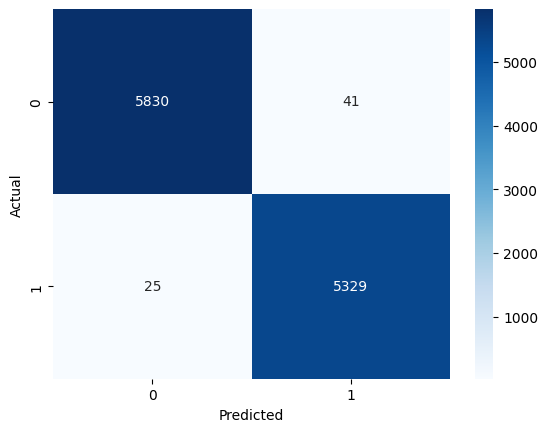

In [65]:
import seaborn as sns

preds = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# 8️⃣ Save Model + Vectorizer

In [59]:
import os

os.makedirs("../models", exist_ok=True)


joblib.dump(model, "../models/model.joblib")
joblib.dump(vectorizer, "../models/vectorizer.joblib")
print("Model and Vectorizer saved.")

Model and Vectorizer saved.


# 9️⃣ News Detection Function

In [76]:
import joblib
import re
import pandas as pd

# Load Model + Vectorizer
model = joblib.load("../models/model.joblib")
vectorizer = joblib.load("../models/vectorizer.joblib")

# Text cleaning
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = text.replace("\n", " ")
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Prediction Function returning DataFrame
def predict_fake_news_df(text: str):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    
    pred = model.predict(vec)[0]
    proba = model.predict_proba(vec)[0][pred] * 100  # convert to %

    # Create DataFrame output
    df_output = pd.DataFrame({
        "Input_Text": [text],
        "Cleaned_Text": [cleaned],
        "Prediction": ["REAL" if pred == 1 else "FAKE"],
        "Confidence (%)": [round(proba, 2)]
    })

    return df_output


# Sample Use Case

In [77]:
news = "WASHINGTON (Reuters) - The government approved a new policy today."

result_df = predict_fake_news_df(news)
result_df


,Input_Text,Cleaned_Text,Prediction,Confidence (%)
0,WASHINGTON (Reuters) - The government approved...,WASHINGTON (Reuters) - The government approved...,REAL,99.93
